# AS4PA Second set of exercises:

Gaudio Raffaele (2057974)

Delivery: 17/04/2022 (Happy Ester!)

In [44]:
library("ggplot2")
library("GoFKernel")

### Exercise 1 

A set of measurements have been performed on the concentration of a contaminant in tap water. The following tables reports a set of values (x), with the corresponding probabilities given by the two methods (p1 and p2):


| x | 15.58 | 15.9 | 16 | 16.1 | 16.2 |
| --- | --- | --- | --- | --- | --- |
| p1 | 0.15 | 0.21 | 0.35 | 0.15 | 0.14 |
| p2 | 0.14 | 0.05 | 0.64 | 0.08 | 0.09 |

a) Evaluate the expected values, E[X], and the variance, Var(X), for both methods.


In [2]:
# a) Evaluate the expected values, E[X], and the variance, Var(X), for both methods.

x<-c(15.58,15.9,16,16.1,16.2)
p1<-c(0.15,0.21,0.35,0.15,0.14)
p2<-c(0.14,0.05,0.64,0.08,0.09)

tap_water<-data.frame(x,p1,p2)

E_p1<-x %*% p1
E_p2<-x %*% p2

Var_p1<-(x^2 %*% p1) - E_p1^2
Var_p2<-(x^2 %*% p2) - E_p2^2

Mean<-c(E_p1,E_p2)
Var<-c(Var_p1,Var_p2)
Method<-c("p1","p2")

results<-data.frame(Method,Mean,Var)
results

Method,Mean,Var
<chr>,<dbl>,<dbl>
p1,15.9590,0.03397900
p2,15.9622,0.02816716


### Exercise 2

The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30.

a) simulate the waiting time for 50 people at the doctor’s office and plot the relative histogram

b) what is the probability that a person will wait for less than 10 minutes?

c) evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)

d) what is the probability for waiting more than one hour before being received?


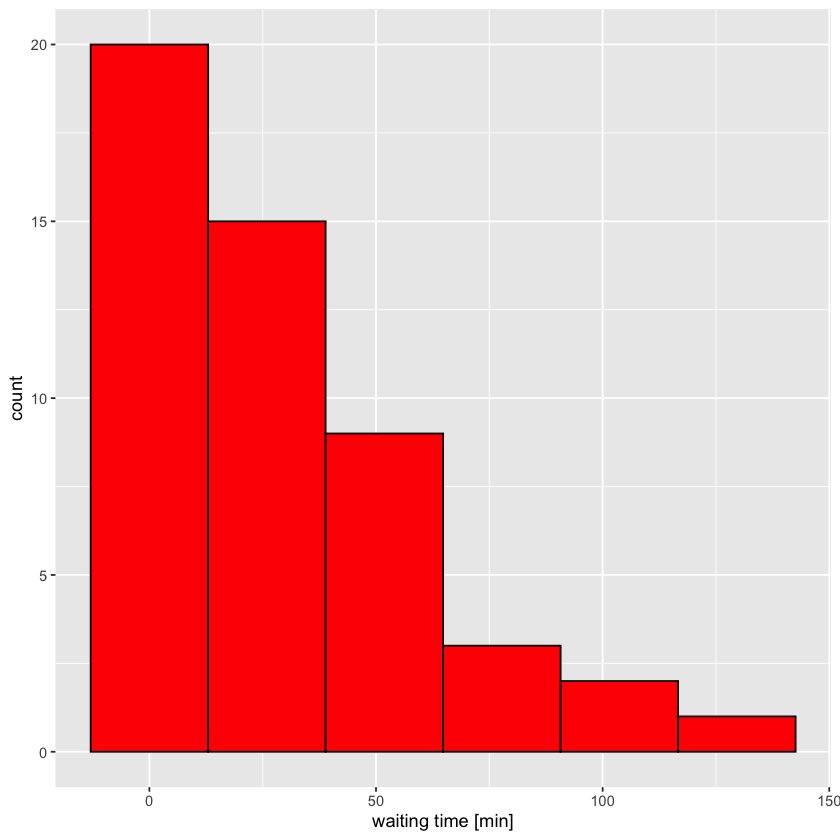

In [3]:
# a) simulate the waiting time for 50 people at the doctor’s office and plot the relative histogram

set.seed(1234) # seed fixed for reproducibility

n=50
rate=1/30

data<-rexp(n, rate = rate)

ggplot()+
    geom_histogram(aes(data), color="black",fill="red",bins=6)+
    labs(x="waiting time [min]")

In [4]:
# b) what is the probability that a person will wait for less than 10 minutes?

prob10<-pexp(10, rate = rate)*100
cat("Probability to wait less than 10 min:",prob10,"%")

Probability to wait less than 10 min: 28.34687 %

In [5]:
# c) evaluate the average waiting time from the simulated data and compare it with the expected value 
#    (calculated from theory and by manipulating the probability distributions using R)  

simulated_mean<-mean(data)
theroretical_mean1<-1/rate
theroretical_mean2<-integrate(function(data){data*dexp(data,rate)}, lower=0, upper=Inf)$value

error<-abs(simulated_mean-theroretical_mean1)

cat("Average waiting time on simulated data:",simulated_mean,"min \n")
cat("Expected value of exponential distribution:",theroretical_mean1,"min \n")
cat("Expected value of exponential distribution (manipulating the probability distribution):",theroretical_mean2,"min \n")
cat("Difference between theoretical expected value and simulated mean:", error)

Average waiting time on simulated data: 29.67523 min 
Expected value of exponential distribution: 30 min 
Expected value of exponential distribution (manipulating the probability distribution): 30 min 
Difference between theoretical expected value and simulated mean: 0.3247699

In [6]:
# d) what is the probability for waiting more than one hour before being received?

prob60<-(1-pexp(60, rate = rate))*100
cat("Probability to wait more than 60 min:",prob60,"%")

Probability to wait more than 60 min: 13.53353 %

### Exercise 3

Let’s suppose that on a book, on average, there is one typo error every three pages. If the number of errors follows a Poisson distribution, plot the pdf and cdf, and calculate the probability that there is at least one error on a specific page of the book.


Probability that there is at least one error on a specific page of the book: 4.462492 %

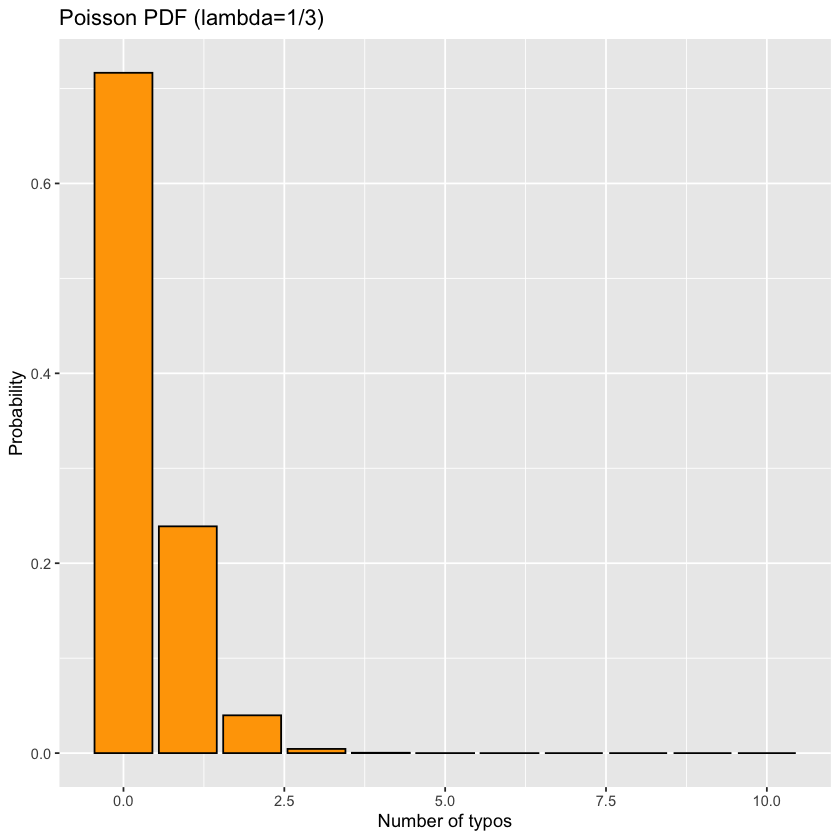

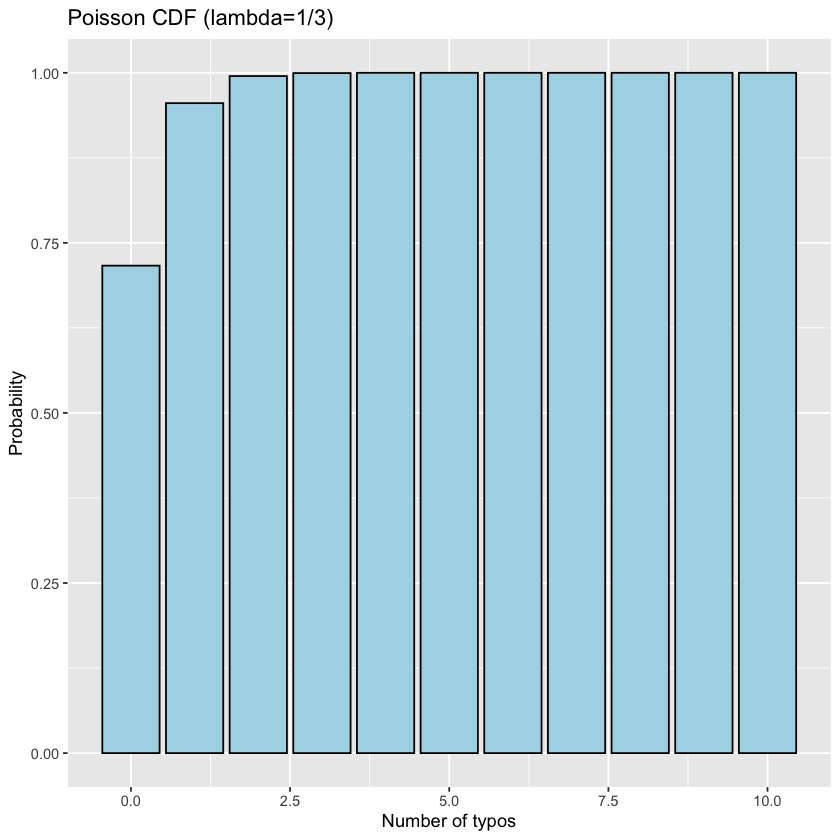

In [129]:
lambda<-1/3
x<-c(0:10)

typo_pdf<-dpois(x,lambda)
typo_cdf<-ppois(x,lambda)

typo_frame<-data.frame(x,typo_pdf,typo_cdf)

prob1<-(1-ppois(1,lambda))*100
cat("Probability that there is at least one error on a specific page of the book:",prob1,"%")

ggplot(typo_frame,aes(x=x,y=typo_pdf))+
   geom_bar(stat="identity",color="black",fill="orange")+
   labs(title="Poisson PDF (lambda=1/3)",x="Number of typos",y="Probability")

ggplot(typo_frame,aes(x=x,y=typo_cdf))+
   geom_bar(stat="identity",color="black",fill="lightblue")+
   labs(title="Poisson CDF (lambda=1/3)",x="Number of typos",y="Probability")

### Exercise 4

We randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn. Calculate the probability that at least 10 draws are needed.
 

In [8]:
#here i use the negative binomial distribution

p<-4/52 #prob to obtain an ace 
fails <- 9 #max number of failures allowed in 10 draws
success <- 1 #min number of successes alloed in 10 draws

prob_ace<-dnbinom(fails,success,p)
result<-prob_ace*100

cat("Probability that at least 10 draws are needed to obtain an Ace on a deck of 52 cards:", result,"%")

Probability that at least 10 draws are needed to obtain an Ace on a deck of 52 cards: 3.742809 %

### Exercise 5

The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form

$$
f(X)=
\begin{cases}
c(t-1)(2-t)       & 1<t<2 \\
0 & otherwise
\end{cases}
$$

where $t$ is the time in hours.

a) Using the integrate() R function, determine the constant c (and verify it analytically).

b) Write the set of four R functions and plot the pdf and cdf, respectively.

c) Evaluate the probability that the student will finish the aptitude test in more than 75 minutes. And that it will take between 90 and 120 minutes.


In [24]:
# a) Using the integrate() R function, determine the constant c (and verify it analytically).

f<-function(t){
    ifelse((t>1 & t<2), (t-1)*(2-t), 0)
}

integral<-integrate(f,1,2)$value
c<-1/integral
cat("Value of normalization constant c:",c)

Value of normalization constant c: 6

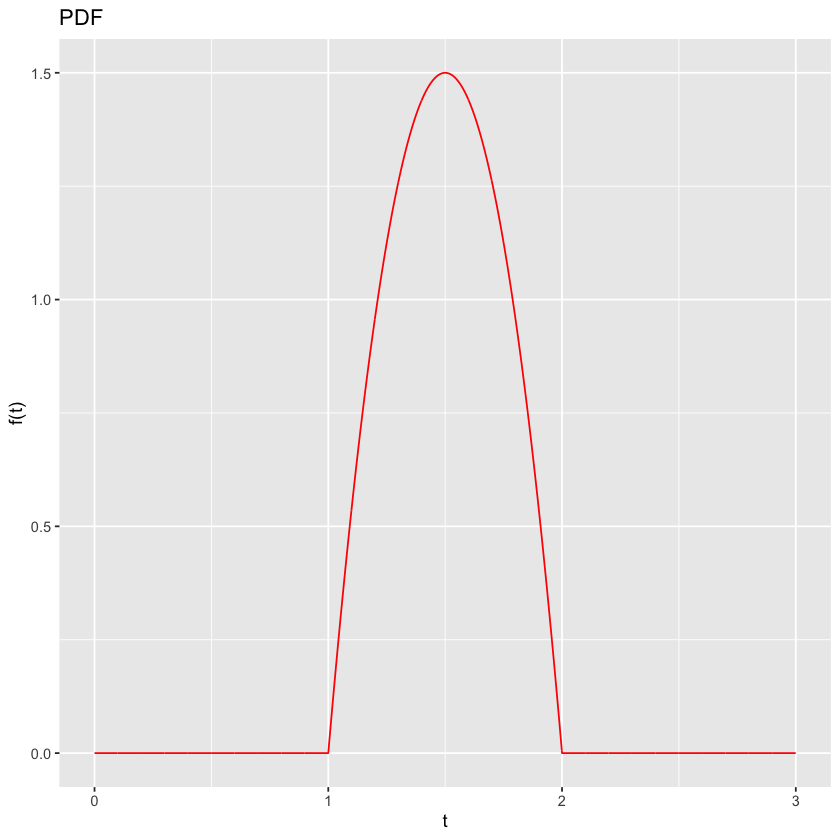

Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


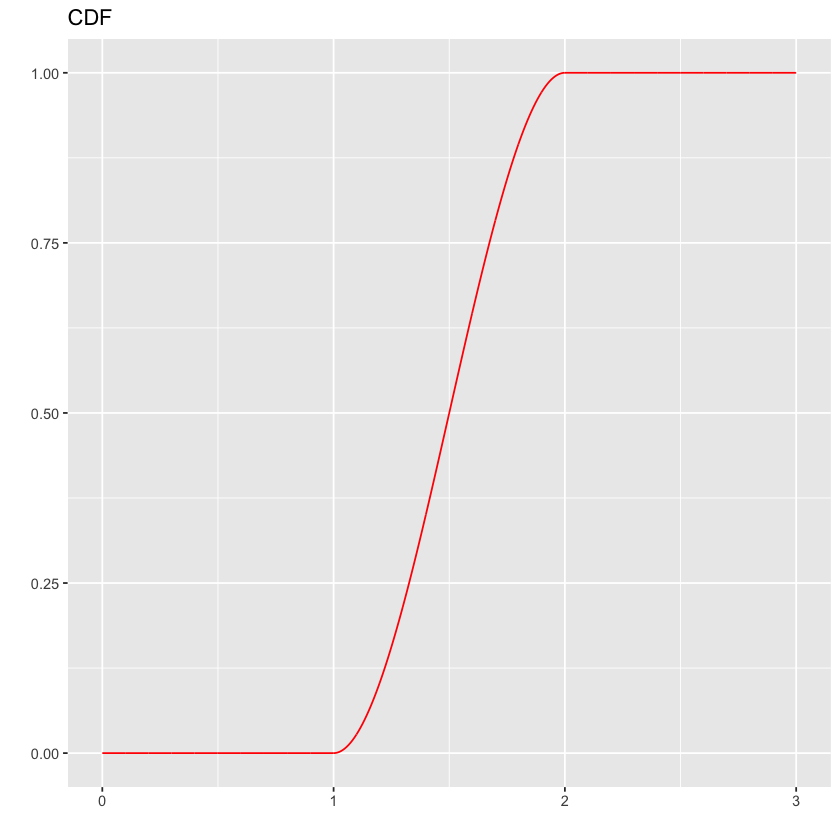

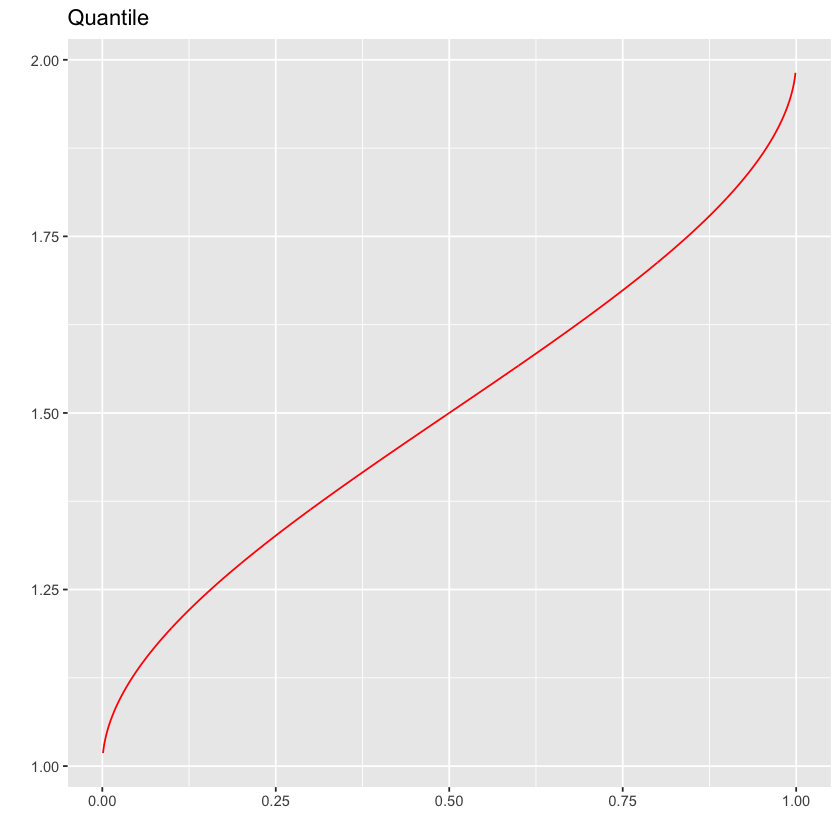

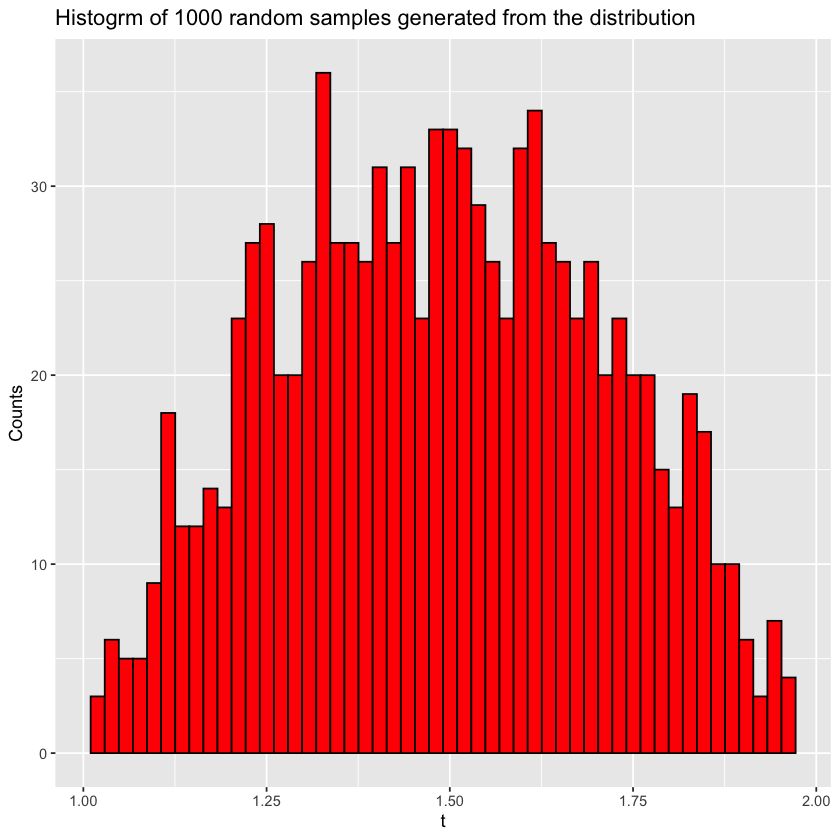

In [27]:
# b) Write the set of four R functions and plot the pdf and cdf, respectively.

d_f<-function(t){
    ifelse((t>1 & t<2), 6*(t-1)*(2-t), 0)
}

p_f<-function(t){
    ifelse((t>1), 
        ifelse((t<2),
            (-2*t^3 + 9*t^2 -12*t)+5,                     
        1),
    0)
}

q_f<-function(t){ 
    q_f_tmp <- Vectorize(inverse(p_f, lower = 1, upper = 2))
        ifelse((t>0 & t<1),
            q_f_tmp(t),
        NA)
}

r_f<-function(n){
    t <- runif(n)
    q_f(t)
}

set.seed(1234)
x<-seq(0,3,0.001)
y<-seq(0,1,0.001)

ggplot()+
    geom_line(aes(x,d_f(x)),color="red")+
    labs(title="PDF",x="t",y="f(t)")

ggplot()+
    geom_line(aes(x,p_f(x)),color="red")+
    labs(title="CDF",x="",y="")

ggplot()+
    geom_line(aes(y,q_f(y)),color="red")+
    labs(title="Quantile",x="",y="")

ggplot()+
    geom_histogram(aes(r_f(1000)), color="black",fill="red",bins=50)+
    labs(title="Histogrm of 1000 random samples generated from the distribution",x="t",y="Counts")

In [22]:
# c) Evaluate the probability that the student will finish the aptitude test in more than 75 minutes. 
#    And that it will take between 90 and 120 minutes.

t1<-5/4 
t2<-3/2

prob_t1<-(1-p_f(t1))*100
prob_t2<-(1-p_f(t2))*100

cat("Probability that a student will finish the test in more than 75 min:",prob_t1,"%\n")
cat("Probability that a student will finish the test between 90 and 120 min:",prob_t2,"%\n")

Probability that a student will finish the test in more than 75 min: 84.375 %
Probability that a student will finish the test between 90 and 120 min: 50 %


### Exercise 6

The lifetime of tires sold by an used tires shop is $10^4$ · x km, where x is a random variable following the distribution funcion

$$
f(X)=
\begin{cases}
\frac{2}{x^2}       & 1<x<2 \\
0 & otherwise
\end{cases}
$$

a) write the set of four R functions and plot the pdf and cdf, respectively.

b) determine the probability that tires will last less than 15000 km.

c) sample 3000 random variables from the distribution and determine the mean value and the variance, using the expression Var(X) = E[X2] − E[X]2.

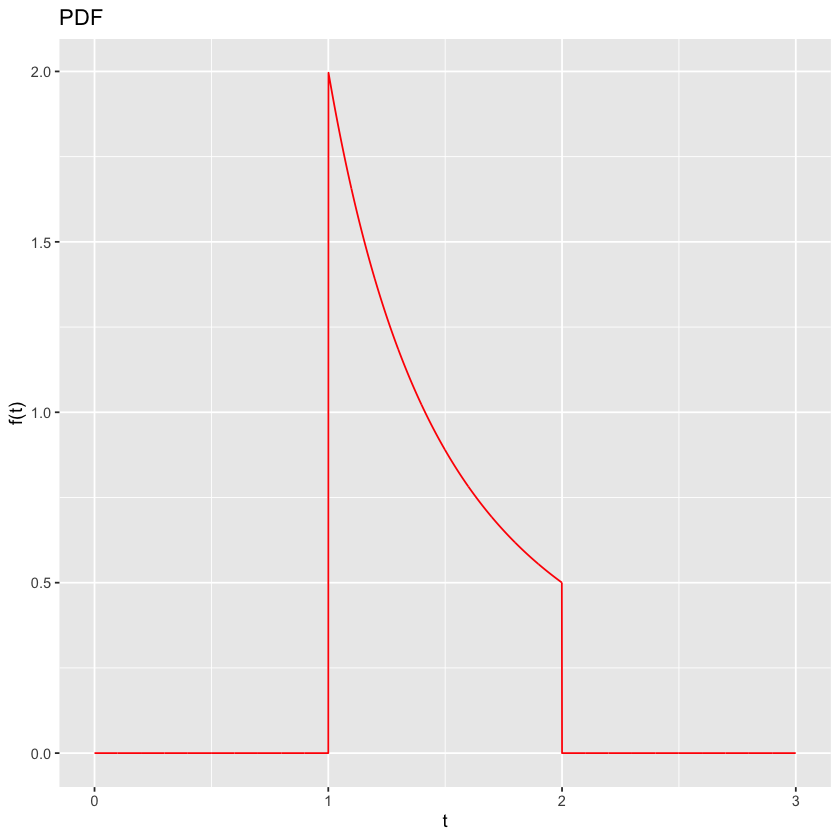

Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


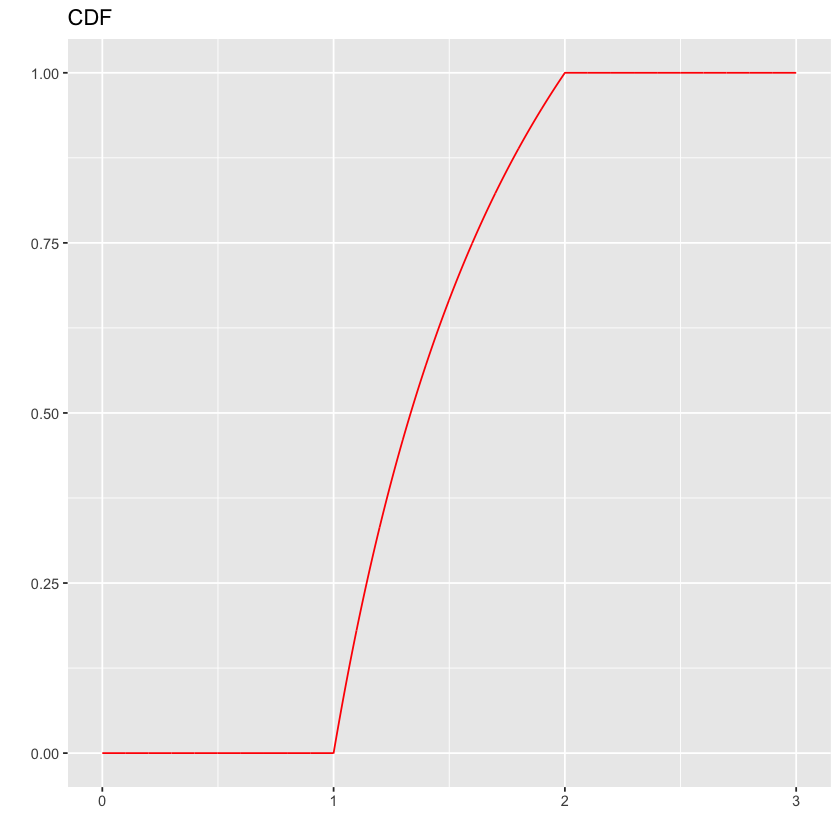

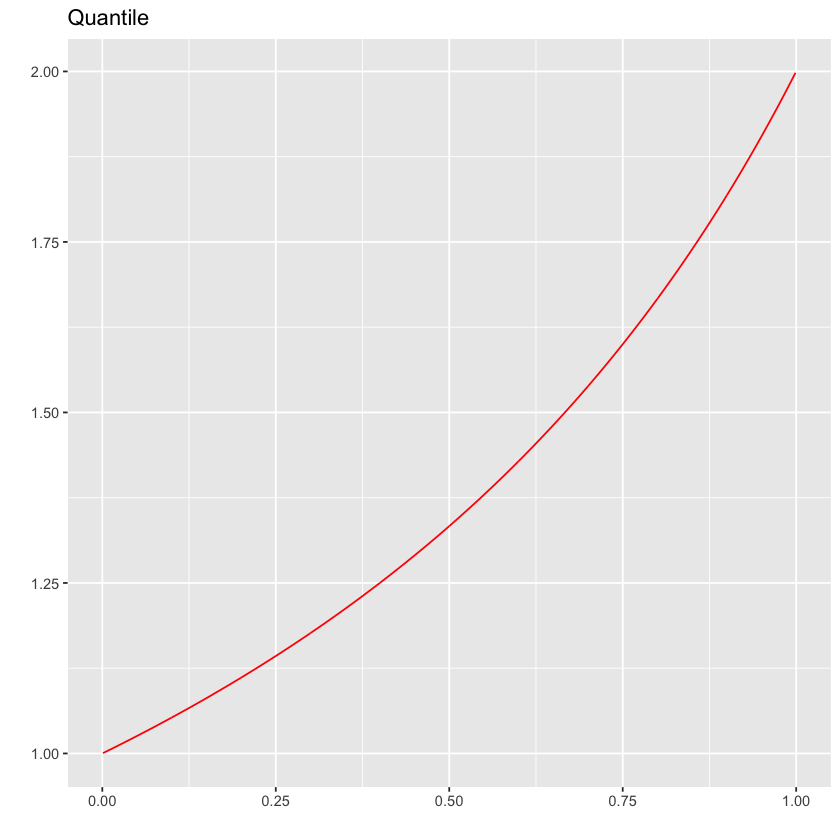

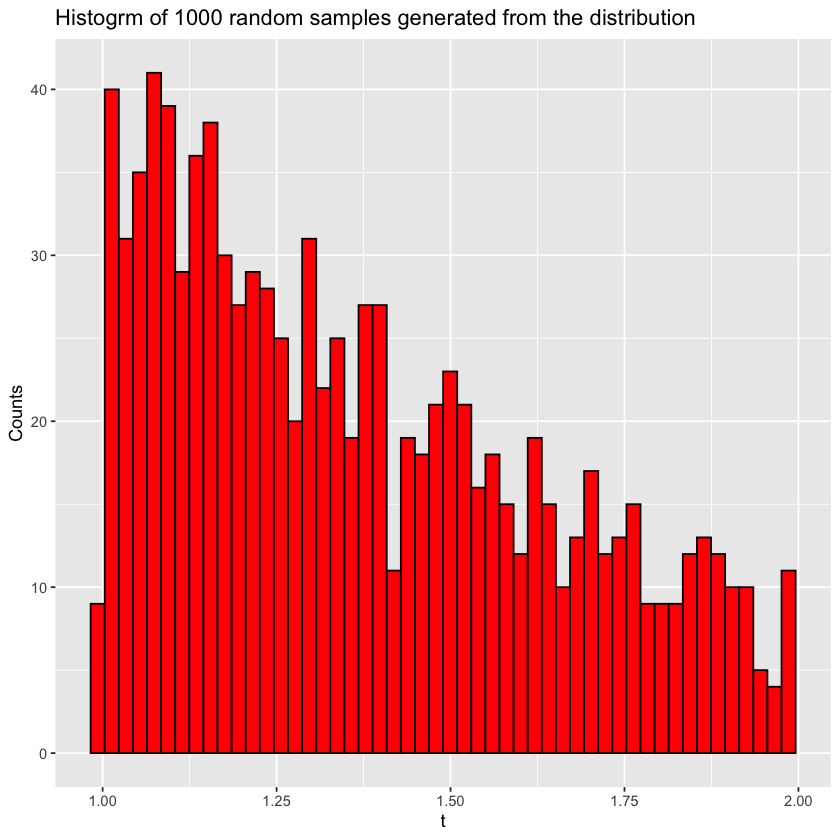

In [40]:
# a) write the set of four R functions and plot the pdf and cdf, respectively.

d_f2<-function(x){
    ifelse((x>1 & x<2), 2/(x^2), 0)
}

p_f2<-function(x){
    ifelse((x>1), 
        ifelse((x<2),
            (-2/x+2),
        1),
    0)
}

q_f2<- function(x){ 
    q_f2_tmp <- Vectorize(inverse(p_f2, lower = 1, upper = 2))
        ifelse((x>0 & x<1),
            q_f2_tmp(x),
        NA)
}

r_f2<-function(n){
    x <- runif(n)
    q_f2(x)
}

set.seed(1234)

x<-seq(0,3,0.001)
y<-seq(0,1,0.001)

ggplot()+
    geom_line(aes(x,d_f2(x)),color="red")+
    labs(title="PDF",x="t",y="f(t)")

ggplot()+
    geom_line(aes(x,p_f2(x)),color="red")+
    labs(title="CDF",x="",y="")

ggplot()+
    geom_line(aes(y,q_f2(y)),color="red")+
    labs(title="Quantile",x="",y="")

ggplot()+
    geom_histogram(aes(r_f2(1000)), color="black",fill="red",bins=50)+
    labs(title="Histogrm of 1000 random samples generated from the distribution",x="t",y="Counts")

In [41]:
# b) determine the probability that tires will last less than 15000 km.
 
 a<-15000/10^4
 
prob<-(p_f2(a))*100

cat("Probability that tires will last less then 15000 km:",prob,"%")
 

Probability that tires will last less then 15000 km: 66.66667 %

Mean: 1.387238 
Var: 0.07743909 
E[X^2]−E[X]^2: 0.07741328

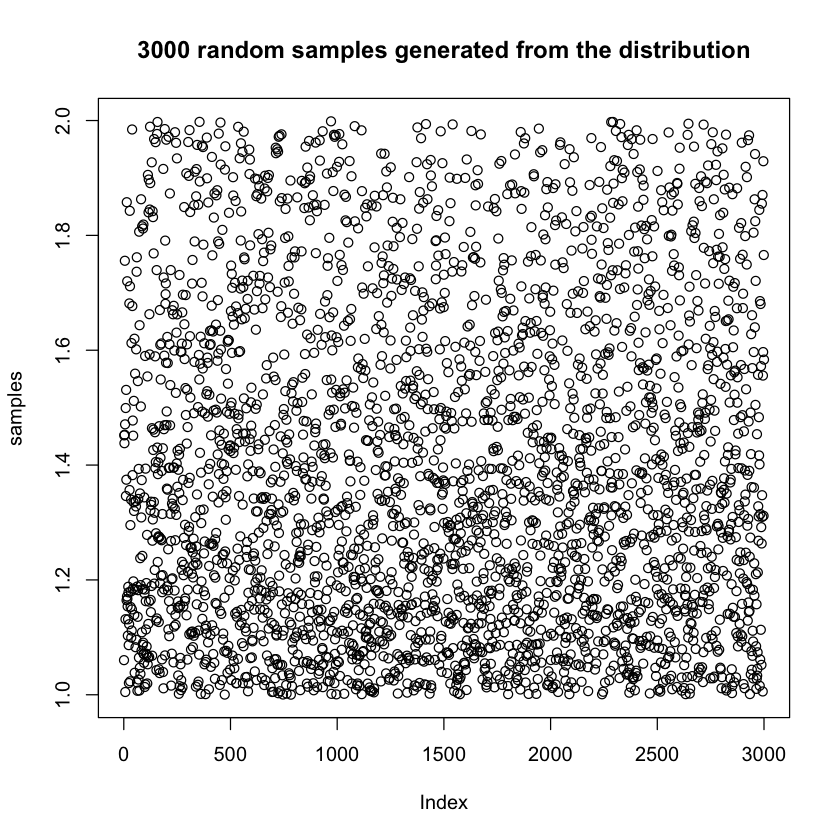

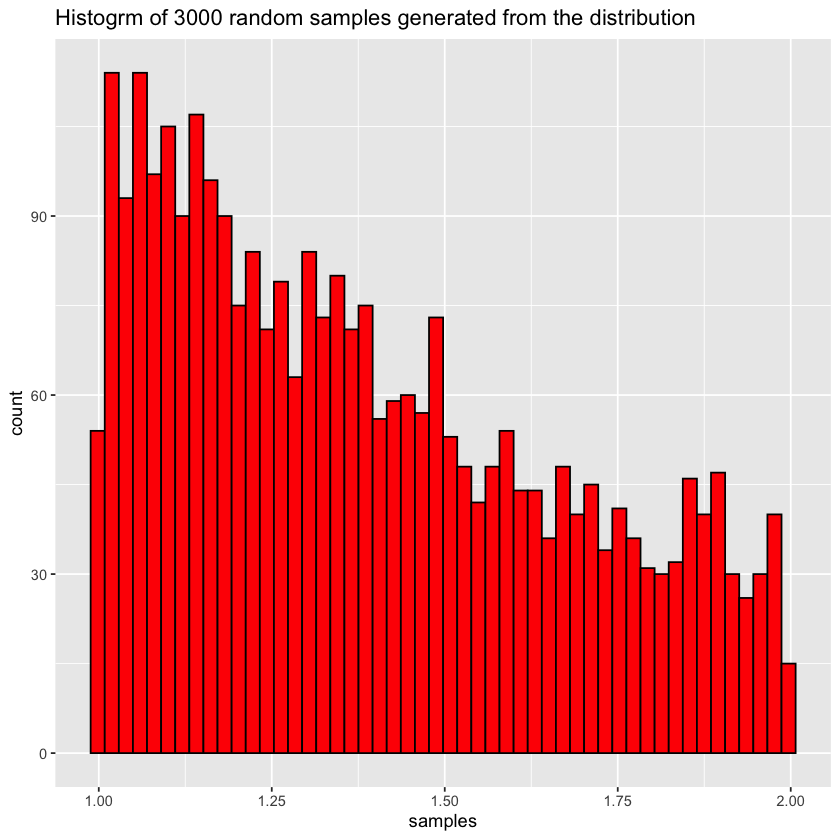

In [53]:
# c) sample 3000 random variables from the distribution and determine the mean value and the variance,
#  using the expression Var(X) = E[X2] − E[X]2.

set.seed(1234)
 
N=3000

samples<-r_f2(N)
hand_var<-mean(samples^2)-(mean(samples)^2)

cat("Mean:",mean(samples),"\n")
cat("Var:",var(samples),"\n")
cat("E[X^2]−E[X]^2:",hand_var)

plot(samples,main="3000 random samples generated from the distribution")

ggplot()+
    geom_histogram(aes(samples), color="black",fill="red",bins=50)+
    labs(title="Histogrm of 3000 random samples generated from the distribution")

### EasterEgg: the "pdqr" package:

Here a little test on the "pdqr" package, a tool to implement the 4 R's function using empirical data.

https://cran.r-project.org/web/packages/pdqr/index.html

reference manual: https://cran.r-project.org/web/packages/pdqr/pdqr.pdf

quick guide with examples: https://cran.r-project.org/web/packages/pdqr/readme/README.html

In [54]:
#install.packages("devtools")
#devtools::install_github("echasnovski/pdqr")

library("pdqr")

In [103]:
set.seed(1234)

#in order to simulate real data, here i use the "r_f2" function 
#as usually: "the more data, the better the results"
test<-r_f2(1e6) 

d_f2_test <- new_d(test, type = "continuous") #probability density function
p_f2_test <- new_p(test, type = "continuous") #cumulative density function
q_f2_test<- new_q(test, type = "continuous")  #quantile function
r_f2_test <- new_r(test, type = "continuous") #generates random numbers from the distribution

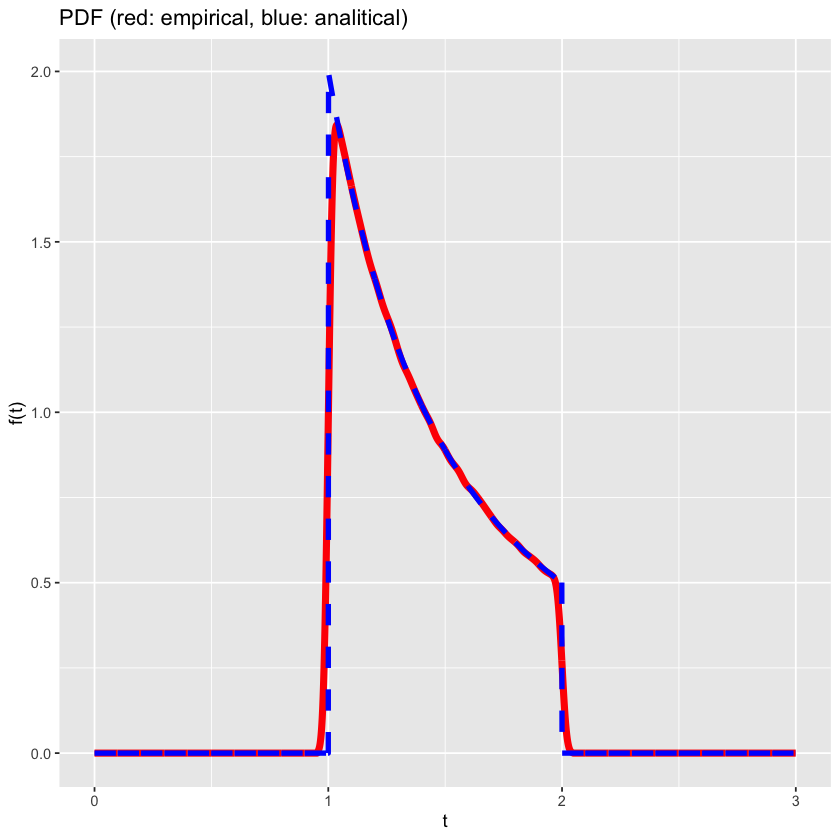

Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


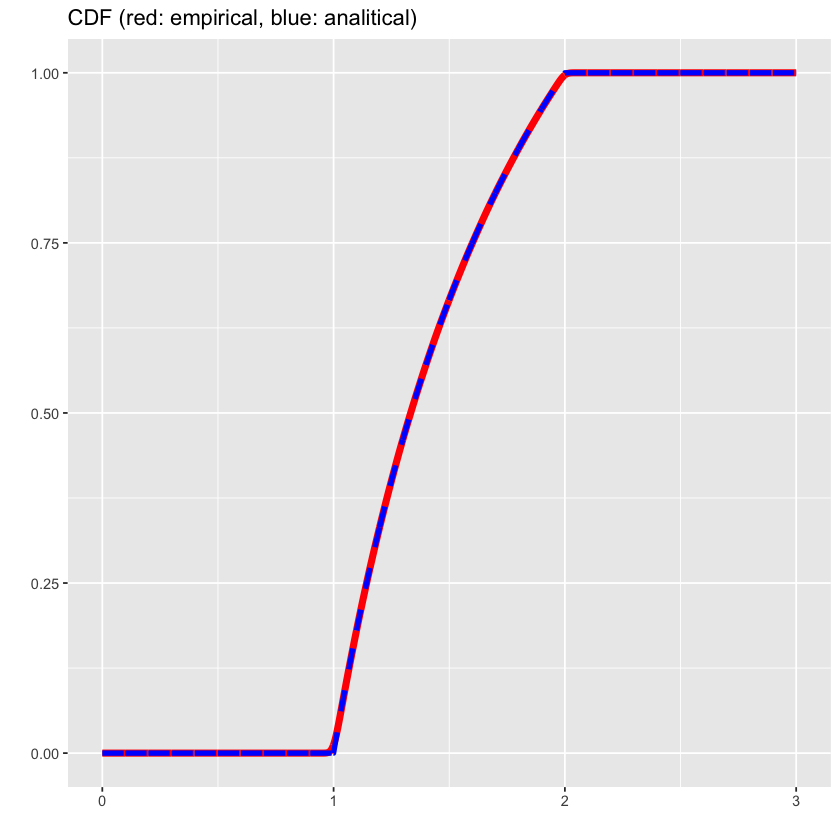

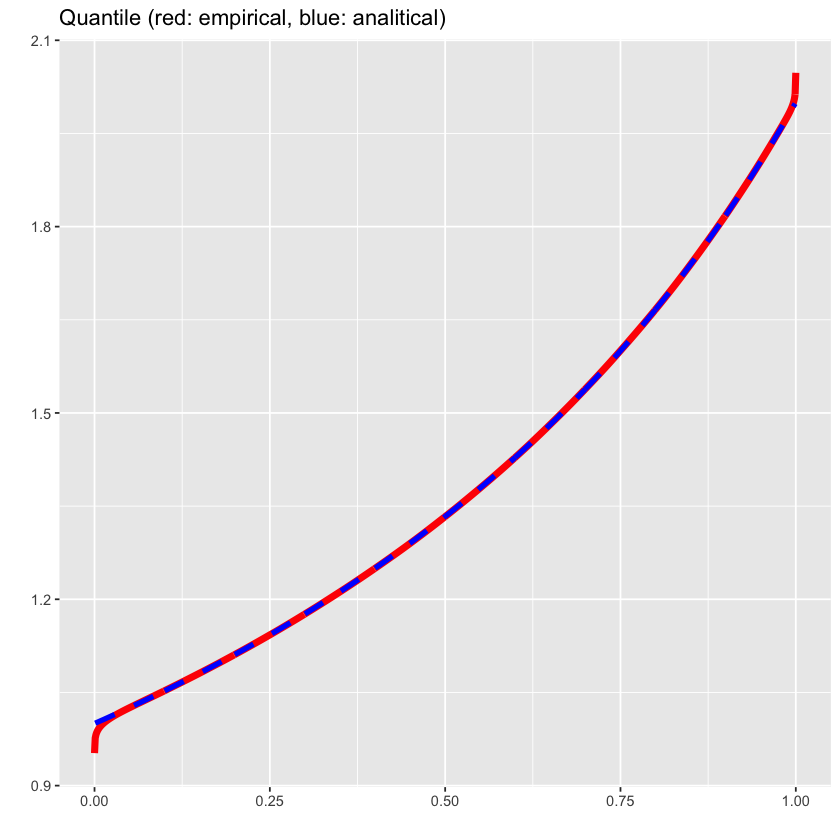

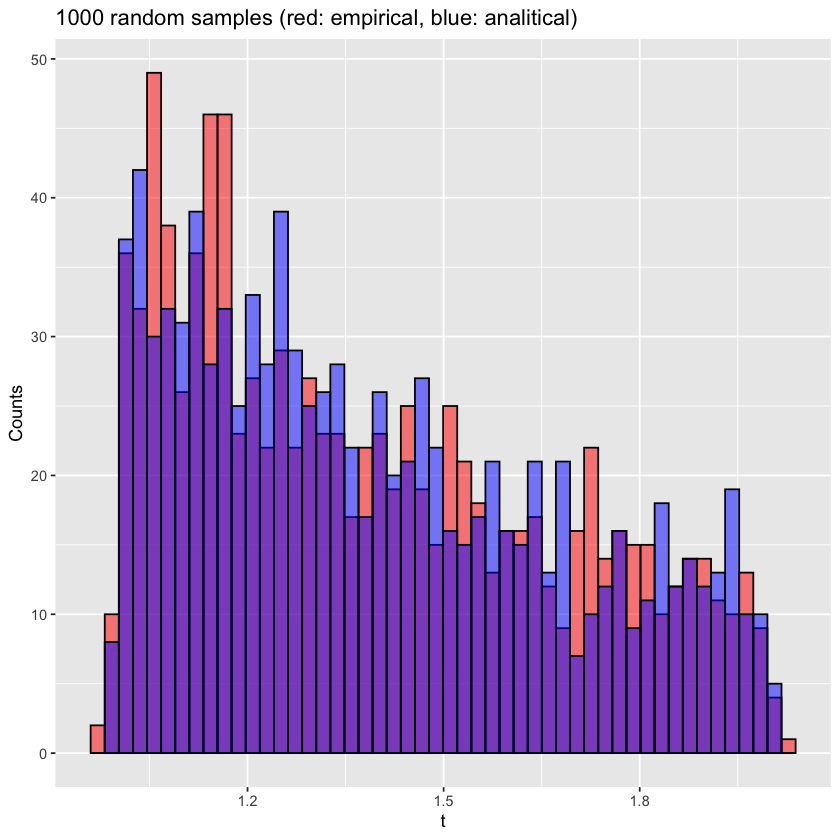

In [121]:
x<-seq(0,3,0.001)
y<-seq(0,1,0.001)

ggplot()+
    geom_line(aes(x,d_f2_test(x)),color="red",size=2)+
    geom_line(aes(x,d_f2(x)),color="blue",linetype = "dashed",size=1.5)+
    labs(title="PDF (red: empirical, blue: analitical)",x="t",y="f(t)")

ggplot()+
    geom_line(aes(x,p_f2_test(x)),color="red",size=2)+
    geom_line(aes(x,p_f2(x)),color="blue",linetype = "dashed",size=1.5)+
    labs(title="CDF (red: empirical, blue: analitical)",x="",y="")

ggplot()+
    geom_line(aes(y,q_f2_test(y)),color="red",size=2)+
    geom_line(aes(y,q_f2(y)),color="blue",linetype = "dashed",size=1.5)+
    labs(title="Quantile (red: empirical, blue: analitical)",x="",y="")

ggplot()+
    geom_histogram(aes(r_f2_test(1000)), color="black",fill="red",bins=50,alpha=0.5)+
    geom_histogram(aes(r_f2(1000)), color="black",fill="blue",bins=50,alpha=0.5)+
    labs(title="1000 random samples (red: empirical, blue: analitical)",x="t",y="Counts")